# Problem domain

We have a dataset that contains three different varities or species of Iris flower. The dataset contains different dimensions of the petal and sepal of the three species. The last column of the data contains the class name or the species of the IRIS flower namely - Setosa, Virginica and Versicolor.

 The dataset contains different dimensions of the petal and sepal of the three species. The last column of the data contains the class name or the species of the IRIS flower namely - Setosa, Virginica and Versicolor.

<img src= "https://www.mghassany.com/courses/MLcourse/img/iris.png" width="600">

**Aim:** We are required to develop and suggest the best machine learning algorithm to predict the class/target/label/species/variety of the flower if given the dimensions of its sepal and petal.

**Data source:** The dataset is in csv format at this location: https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

# 1. Data import
### Loading required libraries

In [1]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# Importing the sklearn modules to be used
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

# Let's import the ML classification algorithms when required in this notebook.

### Load data from data source

In [2]:
# Load in the data and visualize to understand columns, rows & values
# Data is located at: "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
# Same is saved to disk in iris.csv for flexibility in running the examples
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# 2. Data Understanding

### Basic Exploration

As seen in the table, target variable "variety", has 3 classes "Setosa, Virginica and Versicolor" and is dependent on 4 variables: sepal.length, sepal.width, petal.length, petal.width.

3 classes of "variety" can be viewed in Count plot.

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='variety'>

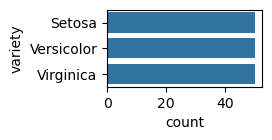

In [3]:
display(df['variety'].value_counts())
plt.figure(figsize = (2,1))
sns.countplot(df['variety'])

#### Observations from basic exploration:
1. There are total 150 records/rows and 5 columns in the dataset.
2. All independent variables have `float` values.
3. The `variety` column which is the target, has categorical/text data.
4. There is no missing value in any row/column. Hence, no need to treat the missing values.
5. Three unique varieties of the IRIS flower have 50 rows each in the dataset. This means total **3** classes to classify the new inputs in.s in.

### Correlation analysis

In [4]:
# Correlation matrix
df.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


sepal.length  sepal.length    1.000000
petal.length  petal.width     0.962865
sepal.length  petal.length    0.871754
              petal.width     0.817941
              sepal.width    -0.117570
sepal.width   petal.width    -0.366126
              petal.length   -0.428440
dtype: float64

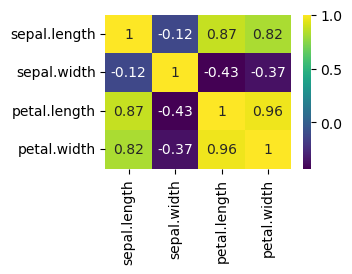

In [5]:
# Let's plot the correlation matrix as a heatmap and view individual correlations
plt.figure(figsize = (3,2))
dfcorr = df.corr(numeric_only=True)
sns.heatmap(dfcorr, annot = True, cmap='viridis')
dfcorr.unstack().sort_values(ascending = False).drop_duplicates()

<font color = "red"> **NOTE:** The last column contains categorical values and hence, it doesn't appear in the coorelation matrix. The coorelation matrix can help us understand how inter-correlation are the independent variables with each other.
    
#### Observation from correlation analysis:
- The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

# 3. Data Preparation

Data preparation is also called data cleaning, data transformation, data wrangling etc.

Next, selecting the predictors and target.

In [6]:
X = df.drop('variety', axis=1)  # taking all columns as input except Variety column
y = df['variety']   # taking only Variety column as the target
# Verifying the features and target variables
display(X.head())
display(y.head())

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

### Splitting the data to train and test sets with startify.

To compare different classification algorithms correctly, we must split the dataset such that all 3 classes are speard uniformly across training and test sets.

For uniformity of variety classes, we use train_test_split with **stratify** parameter. 
test_size 0.3 is used to get train & test sets in 70% and 30% ratio, respectively.

Thus, with the same data set, models' performance can be easily compared against the metrics.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, stratify=y)

In [8]:
# Verify the distribution of classes in both the sets:
print("Train Shape",X_train.shape,"y_train_counts:", y_train.value_counts())
print()  # printing a blank line for spacing
# Let's divide these values by 112 (total rows in training data) to get percentage.
print((y_train.value_counts() / 112) * 100)   # Multiply with 100 to get percentage
print()
# Printing the total counts of unique values in the Y_test
print("Test Shape",X_test.shape, "y_test_counts:", y_test.value_counts())
print()
# Let's divide these values by 38 (total rows in testing data) to get percentage.
print((y_test.value_counts() / 38) * 100)   # Multiply with 100 to get percentage

Train Shape (112, 4) y_train_counts: variety
Versicolor    38
Virginica     37
Setosa        37
Name: count, dtype: int64

variety
Versicolor    33.928571
Virginica     33.035714
Setosa        33.035714
Name: count, dtype: float64

Test Shape (38, 4) y_test_counts: variety
Virginica     13
Setosa        13
Versicolor    12
Name: count, dtype: int64

variety
Virginica     34.210526
Setosa        34.210526
Versicolor    31.578947
Name: count, dtype: float64


# 4. Data modelling

Classification algorithms will performed to classify the target variable (`variety`) based on all 4 independnet variables. 

Then, the accuracy from all the models will be comapred to decide which one performs best. 

The best performing model will be selected to classify IRIS varieties/species.


## <font color = "blue">4.1 Logistic Regression Classification

Logistic regression is used to obtain odds ratio in the presence of more than one explanatory (independent) variable. Please note that even though the name contains **regression** in it, it is used for classification problems, not for predicting continuous values.

The procedure is quite similar to multiple linear regression, with the exception that the response (target) variable is binomial. The result is the impact of each variable on the odds ratio of the observed event of interest.

Let's perform Logistics Regression.

In [9]:
# save results from each model in results dictionary for comparison & plotting at end
modelResults = {}

In [10]:
# Importing the algorithms
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
logPrediction = log.predict(X_test)
logAccuracy = metrics.accuracy_score(y_test, logPrediction)
modelResults["LogisticsRegressor"] = [round(logAccuracy*100), 
                                      metrics.confusion_matrix(y_test, logPrediction),
                                      metrics.classification_report(y_test, logPrediction)]  
print("The accuracy of logistic regression is:", logAccuracy*100, "%")

The accuracy of logistic regression is: 94.73684210526315 %


## <font color = "blue">4.2 k-Nearest Neighbor (k-NN) Classification

KNN is a simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation. 

It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. 

By choosing K, the user can select the number of nearby observations to use in the algorithm.

In [11]:
# importing the model
from sklearn.neighbors import KNeighborsClassifier
# 3 neighbors to find a majority are used as variety has 3 classes. Default is 5.
knn=KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
KNNprediction=knn.predict(X_test)
knnAccuracy = metrics.accuracy_score(y_test, KNNprediction)
modelResults["kNearestNeighnbor"] = [round(knnAccuracy*100), 
                                      metrics.confusion_matrix(y_test, KNNprediction),
                                      metrics.classification_report(y_test, KNNprediction)] 
print("The accuracy of KNN model is:", knnAccuracy*100, "%")

The accuracy of KNN model is: 97.36842105263158 %


## <font color = "blue">4.3 Support Vector Machine

SVM is primarily used for classification problems, although it can be used for regression as well. The objective of the SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. 

The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. 

It becomes difficult to imagine when the number of features exceeds three. 

In [12]:
# Support Vector Machine (SVM) Classifier Algorithm
from sklearn.svm import SVC
svc=SVC()   # SVC stands for Support Vector Classifier
svc.fit(X_train, y_train) 
svcPrediction=svc.predict(X_test)
svcAccuracy = metrics.accuracy_score(y_test, svcPrediction)
modelResults["SupportVectorMc"] = [round(svcAccuracy*100), 
                                  metrics.confusion_matrix(y_test, svcPrediction),
                                  metrics.classification_report(y_test, svcPrediction)] 
print("The accuracy of SVM model is:", svcAccuracy*100, "%")

The accuracy of SVM model is: 94.73684210526315 %


## <font color = "blue">4.4 Decision Tree Classifier

Decision Tree is the most powerful and popular tool for classification and prediction for small datasets.

A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 


In [13]:
# import the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
treePrediction=tree.predict(X_test)
treeAccuracy = metrics.accuracy_score(y_test, treePrediction)
modelResults["DecisionTree"] = [round(treeAccuracy*100), 
                                metrics.confusion_matrix(y_test, treePrediction),
                                metrics.classification_report(y_test, treePrediction)]
print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")

The accuracy of Decision Tree model is: 94.73684210526315 %


## <font color = "blue">4.5 Random forest Classifier

Random forest as name implies contains multiple decision trees to further enhance accuracy.


In [14]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=2000, )
forest.fit(X_train, y_train)
forestPrediction = forest.predict(X_test)
forestAccuracy = metrics.accuracy_score(y_test, forestPrediction)
modelResults["RandomForest"] = [round(forestAccuracy*100), 
                                metrics.confusion_matrix(y_test, forestPrediction),
                                metrics.classification_report(y_test, forestPrediction)]
print("The accuracy of Decision Tree model is:", forestAccuracy*100, "%")

The accuracy of Decision Tree model is: 94.73684210526315 %


In [40]:
# create dataframe to save results with columns: 'model','score','confmatrix','classrpt'
resultDf = pd.DataFrame({'model':[k for k,v in modelResults.items()],'score':[v[0] for k,v in modelResults.items()],
                        'confmat':[v[1] for k,v in modelResults.items()],'classrpt':[v[2] for k,v in modelResults.items()]})
display("Model Results:", resultDf)
display("Individual Classification Model Results:")
print("==" * 20)
for k,v in modelResults.items():
    print("Model: ",k)
    print("--" * 15)
    print("Score: ",str(v[0]),"\nConfusion Matrix:")
    print(v[1])
    print("Classification Report")
    print(v[2])
    print("--" * 15)

'Model Results:'

,model,score,confmat,classrpt
0,LogisticsRegressor,95,"[[13, 0, 0], [0, 11, 1], [0, 1, 12]]",precision recall f1-score ...
1,kNearestNeighnbor,97,"[[13, 0, 0], [0, 12, 0], [0, 1, 12]]",precision recall f1-score ...
2,SupportVectorMc,95,"[[13, 0, 0], [0, 11, 1], [0, 1, 12]]",precision recall f1-score ...
3,DecisionTree,95,"[[13, 0, 0], [0, 11, 1], [0, 1, 12]]",precision recall f1-score ...
4,RandomForest,95,"[[13, 0, 0], [0, 11, 1], [0, 1, 12]]",precision recall f1-score ...


'Individual Classification Model Results:'

Model:  LogisticsRegressor
------------------------------
Score:  95 
Confusion Matrix:
[[13  0  0]
 [ 0 11  1]
 [ 0  1 12]]
Classification Report
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.92      0.92      0.92        12
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

------------------------------
Model:  kNearestNeighnbor
------------------------------
Score:  97 
Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  1 12]]
Classification Report
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.92      1.00      0.96        12
   Virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97

In [ ]:
# The bar plot method 
plt.figure(figsize = (3.5,2.5))
major_ticks_top = np.linspace(0, 100, 6)
minor_ticks_top = np.linspace(0, 100, 21)
#print("major_ticks_top:", major_ticks_top, ", minor_ticks_top", minor_ticks_top)
#major_ticks_top: [  0.  20.  40.  60.  80. 100.] ,
#minor_ticks_top [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65. 70.  75.  80.  85.  90.  95. 100.]
plt.bar(resultDf.model, resultDf.score, color=["red", "green", "blue", "cyan"])
plt.title("Performance comparison of Classficiation models")
plt.ylim(0, 100)
plt.yticks(major_ticks_top)
#ax.set_yticklabels(y_ticks, rotation=0, fontsize=8)
plt.yticks(minor_ticks_top, minor_ticks_top, minor=True)
plt.tick_params(axis='y', which='major', labelsize=9)
plt.tick_params(axis='y', which='minor', labelsize=6)
plt.ylabel('Accuracy')
plt.xlabel("Model Variations")
plt.xticks(rotation=90)
plt.grid(axis='y',which="major", alpha=1)
plt.grid(axis='y',which="minor", alpha=0.45)
plt.show()

# 5. Results presentation

Let's display all charts in 3x3 matrix, starting with iris-db image:

   [irisDB]    [countplot]     [corr-heatmap]
   
[scores]    [cm_hm_1]       [cm_hm_2]
   
[cm_hm_   3][cm_hm_4]       [cm_hm_5]

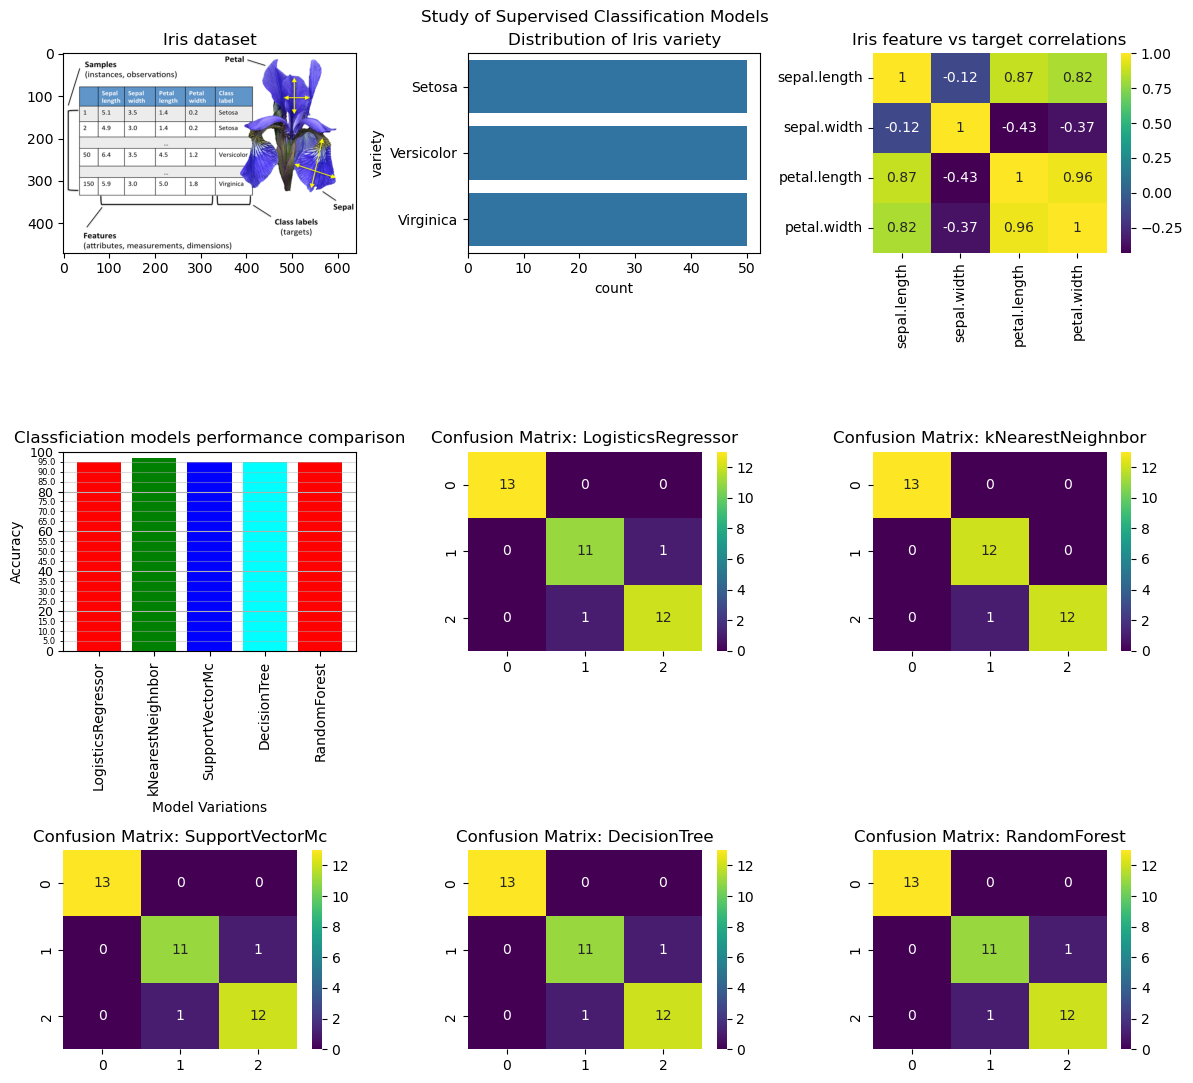

In [16]:
from skimage import io

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,11))
fig.suptitle("Study of Supervised Classification Models", fontsize=12)
axs = axs.flatten()

#axs[0]: figure
image = io.imread('iris.png') # https://www.mghassany.com/courses/MLcourse/img/iris.png')
im = axs[0].imshow(image, aspect='auto')
axs[0].set_title("Iris dataset")

#axs[1]: count plot
sns.countplot(df['variety'], ax=axs[1])
axs[1].set_title("Distribution of Iris variety")

#axs[2]: corre-heatmap
sns.heatmap(dfcorr, annot = True, cmap='viridis', ax=axs[2])
axs[2].set_title("Iris feature vs target correlations")

#axs[3]: scores barplot
major_ticks_top = np.linspace(0, 100, 6)
minor_ticks_top = np.linspace(0, 100, 21)
#print("major_ticks_top:", major_ticks_top, ", minor_ticks_top", minor_ticks_top)
#major_ticks_top: [  0.  20.  40.  60.  80. 100.] ,
#minor_ticks_top [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65. 70.  75.  80.  85.  90.  95. 100.]
axs[3].bar(resultDf.model, resultDf.score, color=["red", "green", "blue", "cyan"])
axs[3].set_title("Classficiation models performance comparison")
axs[3].set_ylim(0, 100)
axs[3].set_yticks(major_ticks_top)
axs[3].set_yticks(minor_ticks_top, minor_ticks_top, minor=True)
axs[3].tick_params(axis='y', which='major', labelsize=9)
axs[3].tick_params(axis='y', which='minor', labelsize=6)
axs[3].set_ylabel('Accuracy')
axs[3].set_xlabel("Model Variations")
axs[3].set_xticks([0,1,2,3,4], resultDf.model, rotation=90)
axs[3].grid(axis='y', which="major", alpha=1)
axs[3].grid(axis='y', which="minor", alpha=0.45)

#axs[4]-[8]: cm_hm_1-cm_hm_5
modelId = 0
for axsid in range(4, 9):
    sns.heatmap(resultDf.confmat[modelId], annot = True, cmap='viridis', ax=axs[axsid])
    axs[axsid].set_title("Confusion Matrix: "+resultDf.model[modelId])
    modelId += 1

fig.tight_layout()
plt.show()

## Model performance comparison 

'Model Results" and plotted charts show that *kNearestNeighnbor* provides best performance of 97 accuracy, and highest precision of 1.
